In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TO_sim.Q_simul as QSIM
import TO_sim.analytical.sec_order_parameter2 as OSP2
import scipy.interpolate as interpolate

In [4]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [5]:
m = 6
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)

In [6]:
N = 1000
K = 5.7
m = 7
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=5000,start_p=False,seed=6)

sol = Qsimul.solve()
omega = Qsimul.omega

In [7]:
cluster_info = Qsimul.get_cluster(sum_time=500)
r_clu_info = Qsimul.get_r_clu(sum_time=500)

In [8]:
rs_d,rs_u,rs_dFl,rs_uFl,_,_ = OSP2.get_r_sec_np(K,m,F_R0u,F_RMu,samples=30)


In [9]:
# r0 = r_clu_info['r_clu_mean']['0'][-1]
r0 = r_clu_info['r_total_mean'][-1]
OP = 4/np.pi*np.sqrt(K*r0/m) - 0.55

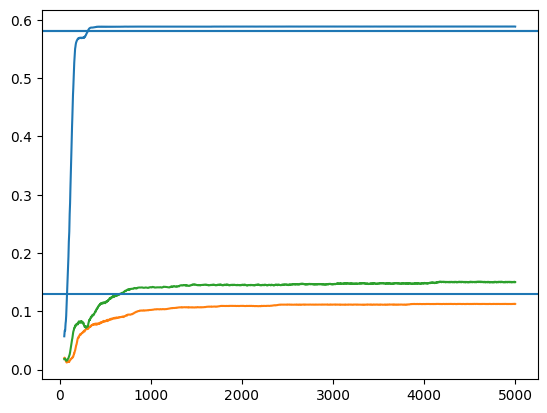

In [10]:
plt.plot(r_clu_info['t_mean'],r_clu_info['r_clu_mean']['0'])
plt.plot(r_clu_info['t_mean'],r_clu_info['r_clu_mean']['-'])
plt.plot(r_clu_info['t_mean'],r_clu_info['r_clu_mean']['+'])
plt.axhline(F_R0u(K))
plt.axhline(F_R0u(K))
plt.axhline(rs_uFl)

In [11]:
Theta_last = Qsimul.Theta_last

In [12]:
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=1500,start_p=False,seed=6)
Qsimul.Theta_ori = Theta_last

In [13]:
TLO_info = Qsimul.TLO(K_start=0,K_end=15)

In [14]:
Ks = TLO_info['Ks']
r_info = TLO_info['r_info']
K_ = np.linspace(0,15,10000)

In [15]:
r_info

,r_mean,r0,r+,r-,r+_total,r-_total,sig_mean,sig0,sig+,sig-,sig+_total,sig-_total
0.0,0.023105,NaN,NaN,NaN,0.018164,0.016208,0.01209,NaN,NaN,NaN,0.006702,0.007023
0.1,0.018247,NaN,NaN,NaN,0.014349,0.011764,0.008739,NaN,NaN,NaN,0.005185,0.006343
0.2,0.028964,NaN,NaN,NaN,0.020236,0.020971,0.013012,NaN,NaN,NaN,0.009704,0.007447
0.3,0.019768,NaN,NaN,NaN,0.013498,0.015591,0.011693,NaN,NaN,NaN,0.007925,0.007055
0.4,0.039871,NaN,NaN,NaN,0.033726,0.032721,0.020349,NaN,NaN,NaN,0.012788,0.01282
...,...,...,...,...,...,...,...,...,...,...,...,...
14.6,0.907587,0.926163,0.015115,0.015115,0.016064,0.016064,0.019389,0.00028,0.000811,0.000811,0.00359,0.00359
14.7,0.907424,0.926187,0.015143,0.015143,0.016153,0.016153,0.01956,0.000301,0.000838,0.000838,0.003807,0.003807
14.8,0.907411,0.926209,0.015204,0.015204,0.016209,0.016209,0.019539,0.000311,0.000729,0.000729,0.003688,0.003688
14.9,0.907229,0.926231,0.015231,0.015231,0.016233,0.016233,0.019537,0.000328,0.000753,0.000753,0.003712,0.003712


In [16]:
K_draw = np.arange(0,15+0.1/2,0.1)
_,_,rs_d,rs_u,_,_= OSP2.get_r_sec_np(K_draw,m,F_R0u,F_RMu,samples=30)

Text(0.5, 1.0, '$m = 7, N = 1000$')

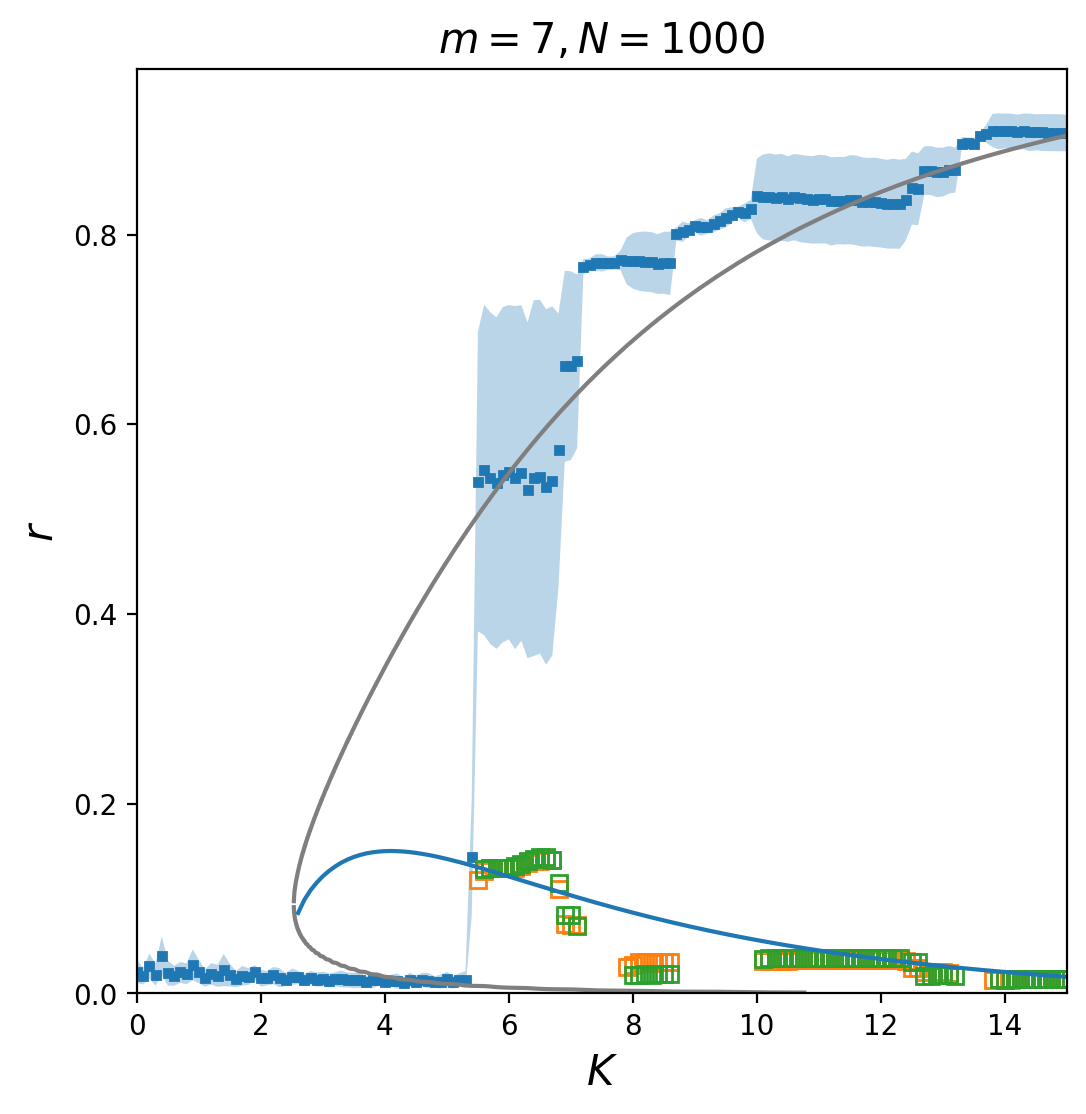

In [17]:
RS = r_info.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_Ml, =plt.plot(r_info['r_mean'],color='tab:blue',marker='s',markersize=3,linestyle='None')
r_Mlf = plt.fill_between(Ks,(r_info['r_mean']-r_info['sig_mean']).to_numpy(float),
                 (r_info['r_mean']+r_info['sig_mean']).to_numpy(float),alpha=0.3)

plt.plot(r_info['r+'],color='tab:orange',marker='s',markersize=6,fillstyle='none',linestyle='None')
plt.plot(r_info['r-'],color='tab:green',marker='s',markersize=6,fillstyle='none',linestyle='None')
# r_Mlf = plt.fill_between(Ks,(r_info['r+']-r_info['sig+']).to_numpy(float),
#                  (r_info['r+']+r_info['sig+']).to_numpy(float),alpha=0.3)


RMl, = plt.plot(K_,F_RMu(K_),color='tab:grey')
plt.plot(K_,F_RMd(K_),color='tab:grey')
plt.plot(K_draw,rs_u)

# plt.legend([(r_Ml,r_Mlf),RMl],['$r$','$r_{anlytical}$','$r_{stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# R_STD = OSP.get_rstd(F_R0u(Ks),rs_u,K,m)
# plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:grey')

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.0)
plt.xlim(0,15)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

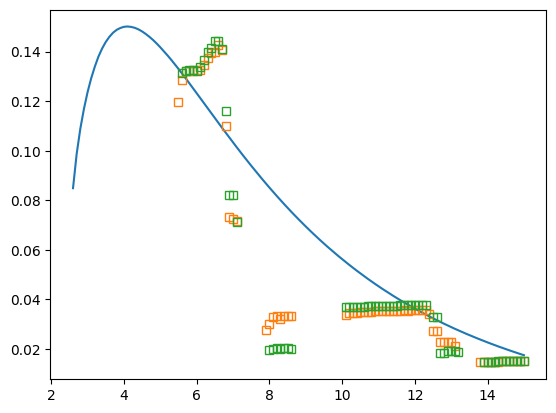

In [18]:
plt.plot(K_draw,rs_u)
plt.plot(r_info['r+'],color='tab:orange',marker='s',markersize=6,fillstyle='none',linestyle='None')
plt.plot(r_info['r-'],color='tab:green',marker='s',markersize=6,fillstyle='none',linestyle='None')

In [19]:
TLO_info['cluster_info']

,S0,S+,S-,S+_total,S-_total,v0,v+,v-,v+_total,v-_total,...,min_O0,min_O+,min_O-,min_O+_total,min_O-_total,mean_O0,mean_O+,mean_O-,mean_O+_total,mean_O-_total
0.0,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795087,-0.795087,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.1,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795087,-0.795087,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.2,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795087,-0.795087,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.3,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795087,-0.795087,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.4,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795043,-0.795043,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.6,928,16,16,36,36,0.0,1.526554,-1.526554,1.904438,-1.904438,...,-1.812363,1.787071,-2.033936,1.787071,-3.090529,-0.0,1.907029,-1.907029,2.171259,-2.171259
14.7,928,16,16,36,36,0.0,1.517116,-1.517116,1.900634,-1.900634,...,-1.812363,1.787071,-2.033936,1.787071,-3.090529,-0.0,1.907029,-1.907029,2.171259,-2.171259
14.8,928,16,16,36,36,-0.0,1.513373,-1.513373,1.898832,-1.898832,...,-1.812363,1.787071,-2.033936,1.787071,-3.090529,0.0,1.907029,-1.907029,2.171259,-2.171259
14.9,928,16,16,36,36,0.0,1.507032,-1.507032,1.89263,-1.89263,...,-1.812363,1.787071,-2.033936,1.787071,-3.090529,-0.0,1.907029,-1.907029,2.171259,-2.171259


In [20]:
OO,KK=np.meshgrid(omega,Ks)

In [21]:
CLUSTER = np.ones_like(OO)

In [22]:
TLO_info['CLU_idx']

,CLU0,CLU+,CLU-,CLU+_total,CLU-_total
0.0,NaN,NaN,NaN,"[500, 501, 502, 503, 504, 505, 506, 507, 508, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
0.1,NaN,NaN,NaN,"[500, 501, 502, 503, 504, 505, 506, 507, 508, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
0.2,NaN,NaN,NaN,"[500, 501, 502, 503, 504, 505, 506, 507, 508, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
0.3,NaN,NaN,NaN,"[500, 501, 502, 503, 504, 505, 506, 507, 508, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
0.4,NaN,NaN,NaN,"[500, 501, 502, 503, 504, 505, 506, 507, 508, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...,...,...
14.6,"[34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
14.7,"[34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
14.8,"[34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
14.9,"[34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 3...","[963, 964, 966, 967, 968, 969, 970, 971, 972, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [23]:
CLUSTER = np.ones_like(OO)
for i,clus in enumerate(TLO_info['CLU_idx'].values):
    for clu,c in zip(clus,[0,1,-1,2,-2]):
        
        if type(clu)==np.ndarray:
            CLUSTER[i][clu] = c

In [24]:
for i,clus in enumerate(TLO_info['CLU_idx']['CLU+'].values):
    if type(clus)==np.ndarray:
            CLUSTER[i][clus] = 1

for i,clus in enumerate(TLO_info['CLU_idx']['CLU-'].values):
    if type(clus)==np.ndarray:
            CLUSTER[i][clus] = -1

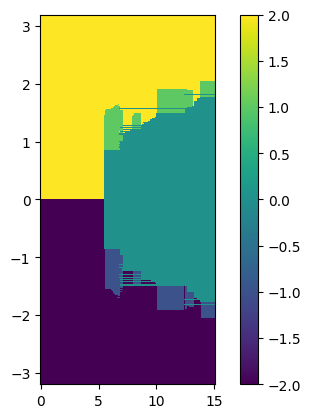

In [25]:
plt.pcolormesh(Ks,(omega),CLUSTER.T[::])
plt.colorbar()
plt.gca().set_aspect(5)
# plt.plot(Ks,OPS)
# plt.plot(Ks,-OPS)
# plt.plot(Ks,OPSA),,,,

In [26]:
r_info

,r_mean,r0,r+,r-,r+_total,r-_total,sig_mean,sig0,sig+,sig-,sig+_total,sig-_total
0.0,0.023105,NaN,NaN,NaN,0.018164,0.016208,0.01209,NaN,NaN,NaN,0.006702,0.007023
0.1,0.018247,NaN,NaN,NaN,0.014349,0.011764,0.008739,NaN,NaN,NaN,0.005185,0.006343
0.2,0.028964,NaN,NaN,NaN,0.020236,0.020971,0.013012,NaN,NaN,NaN,0.009704,0.007447
0.3,0.019768,NaN,NaN,NaN,0.013498,0.015591,0.011693,NaN,NaN,NaN,0.007925,0.007055
0.4,0.039871,NaN,NaN,NaN,0.033726,0.032721,0.020349,NaN,NaN,NaN,0.012788,0.01282
...,...,...,...,...,...,...,...,...,...,...,...,...
14.6,0.907587,0.926163,0.015115,0.015115,0.016064,0.016064,0.019389,0.00028,0.000811,0.000811,0.00359,0.00359
14.7,0.907424,0.926187,0.015143,0.015143,0.016153,0.016153,0.01956,0.000301,0.000838,0.000838,0.003807,0.003807
14.8,0.907411,0.926209,0.015204,0.015204,0.016209,0.016209,0.019539,0.000311,0.000729,0.000729,0.003688,0.003688
14.9,0.907229,0.926231,0.015231,0.015231,0.016233,0.016233,0.019537,0.000328,0.000753,0.000753,0.003712,0.003712


In [27]:
F_SRU = interpolate.interp1d(K_draw,rs_u, kind='linear',bounds_error=False)

In [28]:
RM = r_info['r_mean'].to_numpy(float)
R0 = r_info['r0'].to_numpy(float)
RP = r_info['r+'].to_numpy(float)
OPN = TLO_info['cluster_info']['min_O+']-TLO_info['cluster_info']['mean_O0']

OP = 4/np.pi *np.sqrt(Ks*RM/m) - 0.3056/np.sqrt(Ks*RM*m**3)
OSP = 4/np.pi *np.sqrt(Ks*RP/m) - 0.3056/np.sqrt(Ks*RP*m**3)
SS = (Ks**2*RP*R0)/(2*m*(1/m**2+(OPN)**2)) - (Ks**2*RP*RP)/(2*m**2*OPN*(1/m**2+(2*OPN)**2))

OPA = 4/np.pi *np.sqrt(Ks*F_RMu(Ks)/m) - 0.3056/np.sqrt(Ks*F_RMu(Ks)*m**3)
SA = (Ks**2*F_SRU(Ks)*F_R0u(Ks))/(2*m*(1/m**2+(OPA)**2)) - (Ks**2*F_SRU(Ks)*F_SRU(Ks))/(2*m**2*OPA*(1/m**2+(2*OPA)**2))
OPSA = 4/np.pi *np.sqrt(Ks*F_SRU(Ks)/m) - 0.3056/np.sqrt(Ks*F_SRU(Ks)*m**3)

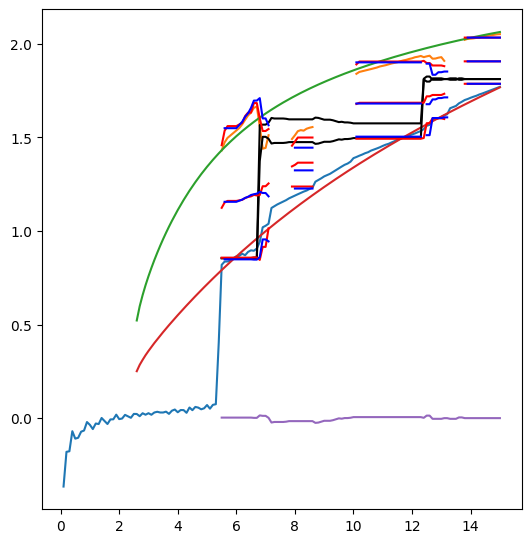

In [29]:
from mpl_toolkits.axes_grid1 import Divider, Size
fig = plt.figure(figsize=(6, 6))

# The first & third items are for padding and the second items are for the
# axes. Sizes are in inches.
h = [Size.Fixed(1.0), Size.Scaled(1.), Size.Fixed(.2)]
v = [Size.Fixed(0.7), Size.Scaled(1.), Size.Fixed(.3)]

divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
# The width and height of the rectangle are ignored.

ax = fig.add_axes(divider.get_position(),
                  axes_locator=divider.new_locator(nx=1, ny=1))


plt.plot(Ks,OP)
plt.plot(Ks,OPN+OSP+SS)
# plt.plot(Ks,OPN+SS,color='red')
plt.plot(Ks,OPA+OPSA+SA)
plt.plot(Ks,OPA)
# ax.plot([1, 2, 3])

# plt.show()
plt.sca(ax)

plt.plot(TLO_info['cluster_info']['mean_O0'])
plt.plot(abs(TLO_info['cluster_info']['max_O0']-TLO_info['cluster_info']['mean_O0']),color='black')
plt.plot(abs(TLO_info['cluster_info']['min_O0']-TLO_info['cluster_info']['mean_O0']),color='black')

plt.plot(TLO_info['cluster_info']['mean_O+']-TLO_info['cluster_info']['mean_O0'],color='red')
plt.plot(TLO_info['cluster_info']['max_O+']-TLO_info['cluster_info']['mean_O0'],color='red')
plt.plot(TLO_info['cluster_info']['min_O+']-TLO_info['cluster_info']['mean_O0'],color='red')
plt.plot(-TLO_info['cluster_info']['mean_O-']+TLO_info['cluster_info']['mean_O0'],color='blue')
plt.plot(-TLO_info['cluster_info']['max_O-']+TLO_info['cluster_info']['mean_O0'],color='blue')
plt.plot(-TLO_info['cluster_info']['min_O-']+TLO_info['cluster_info']['mean_O0'],color='blue')
# plt.xticks( ha='right'
# plt.gca().set_aspect(2)
# plt.gca().set_anchor()




## 2차 클러스터의 형성은 어떤 과정을 통해서 만들어 지는 것일까? 

기존클러스터가 형성된 상태에서 메인클러스터로 흡수되는 경향이 강해짐?

어떤 값이랑 영향을 받음? 

In [463]:
Ks[62]

6.2

In [540]:
K_ = np.linspace(0,30,10000)
get_K = interpolate.interp1d(F_R0u(K_),K_,kind='linear',bounds_error=False)
K_match = get_K(R0)
OPM = OSP2.get_OPM(F_RMu(K_match),K_match,m)
K_idx = 117
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,OPM[K_idx])

In [462]:
Qsimul.get_STEP(TLO_info,s_length=3)

(Float64Index([6.2, 7.2, 7.800000000000001, 11.200000000000001,
               11.700000000000001],
              dtype='float64'),
 Float64Index([7.1, 7.6, 8.600000000000001, 11.5, 13.600000000000001], dtype='float64'))

In [508]:
Ks[K_idx]

6.2

In [509]:
OPMs = OSP2.get_OPM(F_RMu(K_match),Ks,m)

In [503]:
mean_O0 = TLO_info['cluster_info']['mean_O0'].to_numpy(float) 
max_O0 = TLO_info['cluster_info']['max_O0'].to_numpy(float) - mean_O0
min_O0 = TLO_info['cluster_info']['min_O0'].to_numpy(float) - mean_O0

In [541]:
K_draw = np.arange(0,15+0.1/2,0.1)
_,_,rs0_d,rs0_u,_,_= OSP2.get_r_sec_np(K_draw,m,F0_R0u,F0_RMu,OPM[K_idx],samples=30)
# _,_,rs0_d2,rs0_u2,_,_= OSP2.get_r_sec_np(K_draw,m,F0_R0u,F0_RMu,min_O0[K_idx],samples=30)

NameError: name 'K_idx' is not defined

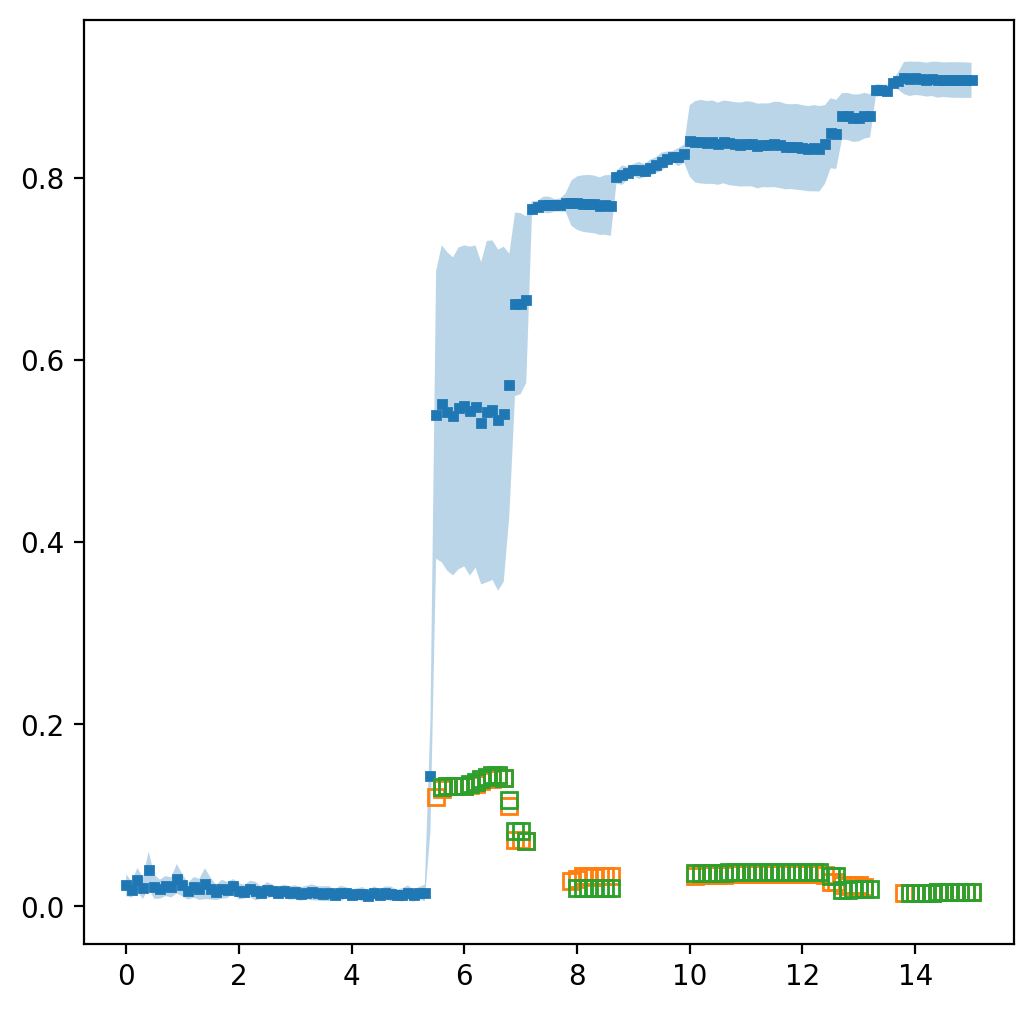

In [30]:
RS = r_info.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_Ml, =plt.plot(r_info['r_mean'],color='tab:blue',marker='s',markersize=3,linestyle='None')
r_Mlf = plt.fill_between(Ks,(r_info['r_mean']-r_info['sig_mean']).to_numpy(float),
                 (r_info['r_mean']+r_info['sig_mean']).to_numpy(float),alpha=0.3)

plt.plot(r_info['r+'],color='tab:orange',marker='s',markersize=6,fillstyle='none',linestyle='None')
plt.plot(r_info['r-'],color='tab:green',marker='s',markersize=6,fillstyle='none',linestyle='None')
# r_Mlf = plt.fill_between(Ks,(r_info['r+']-r_info['sig+']).to_numpy(float),
#                  (r_info['r+']+r_info['sig+']).to_numpy(float),alpha=0.3)

# plt.axvline(8.5)
plt.axvline(Ks[K_idx])
RMl, = plt.plot(K_,F_RMu(K_),color='tab:grey')
RMl, = plt.plot(K_,F0_RMu(K_),color='tab:grey')
plt.plot(K_,F_RMd(K_),color='tab:grey')
plt.plot(K_draw,rs_u)
plt.plot(K_draw,rs0_u)
# plt.plot(K_draw,rs0_u2)

plt.ylim(0.0)
plt.xlim(0,15)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

Text(0.5, 1.0, '$m = 7, N = 2000$')

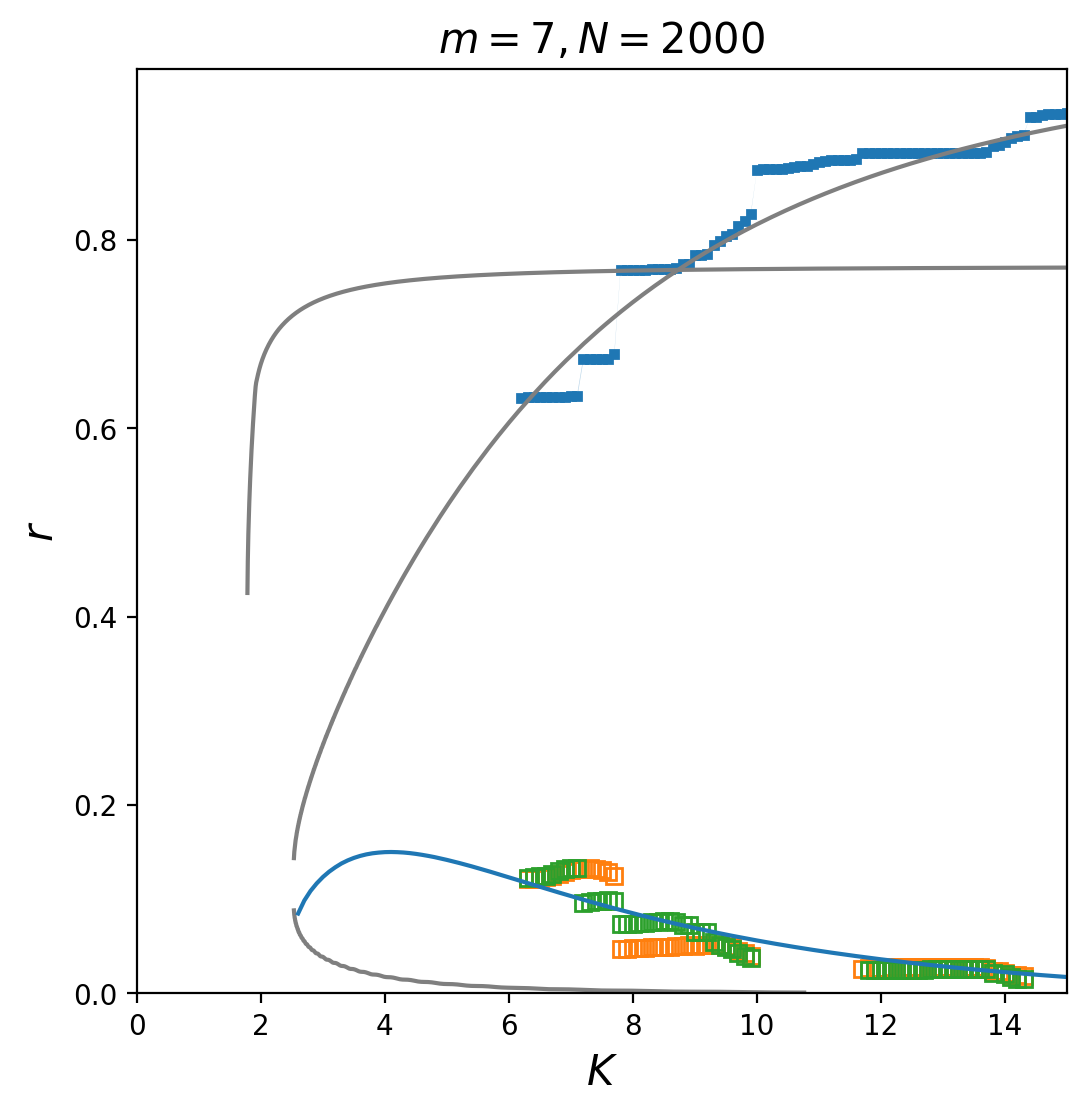

In [536]:
RS = r_info.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_Ml, =plt.plot(r_info['r0'],color='tab:blue',marker='s',markersize=3,linestyle='None')
r_Mlf = plt.fill_between(Ks,(r_info['r0']-r_info['sig0']).to_numpy(float),
                 (r_info['r0']+r_info['sig0']).to_numpy(float),alpha=0.3)

plt.plot(r_info['r+'],color='tab:orange',marker='s',markersize=6,fillstyle='none',linestyle='None')
plt.plot(r_info['r-'],color='tab:green',marker='s',markersize=6,fillstyle='none',linestyle='None')
# r_Mlf = plt.fill_between(Ks,(r_info['r+']-r_info['sig+']).to_numpy(float),
#                  (r_info['r+']+r_info['sig+']).to_numpy(float),alpha=0.3)


RMl, = plt.plot(K_,F_R0u(K_),color='tab:grey')
RMl, = plt.plot(K_,F0_R0u(K_),color='tab:grey')
plt.plot(K_,F_RMd(K_),color='tab:grey')
plt.plot(K_draw,rs_u)

plt.ylim(0.0)
plt.xlim(0,15)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

In [546]:
TLO_info['cluster_info']['S+'].iloc[:].dropna()

6.3     250
6.4     253
6.5     253
6.6     255
6.7     257
       ... 
13.9     51
14.0     46
14.1     41
14.2     41
14.3     39
Name: S+, Length: 64, dtype: object

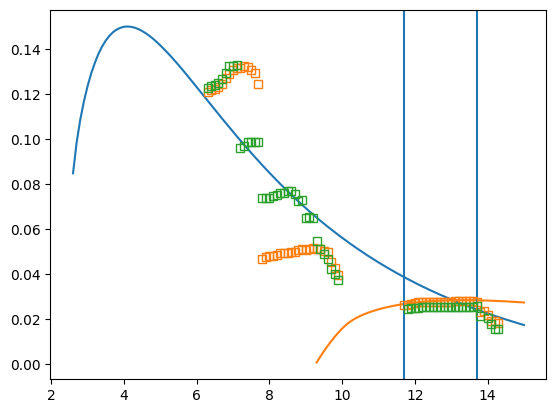

In [544]:
plt.plot(K_draw,rs_u)
plt.plot(K_draw,rs0_u)
# plt.plot(K_draw,rs0_u2)
plt.axvline(Ks[K_idx])
plt.axvline(Ks[K_idx+20])
plt.plot(r_info['r+'],color='tab:orange',marker='s',markersize=6,fillstyle='none',linestyle='None')
plt.plot(r_info['r-'],color='tab:green',marker='s',markersize=6,fillstyle='none',linestyle='None')

In [520]:
RM = r_info['r_mean'].to_numpy(float)
R0 = r_info['r0'].to_numpy(float)
RP = r_info['r+'].to_numpy(float)
OPN = TLO_info['cluster_info']['min_O+']-TLO_info['cluster_info']['mean_O0']

OP = 4/np.pi *np.sqrt(Ks*RM/m) - 0.3056/np.sqrt(Ks*RM*m**3)
OSP = 4/np.pi *np.sqrt(Ks*RP/m) - 0.3056/np.sqrt(Ks*RP*m**3)
SS = (Ks**2*RP*R0)/(2*m*(1/m**2+(OPM)**2)) - (Ks**2*RP*RP)/(2*m**2*OPM*(1/m**2+(2*OPM)**2))


# OPA = 4/np.pi *np.sqrt(Ks*F_RMu(Ks)/m) - 0.3056/np.sqrt(Ks*F_RMu(Ks)*m**3)
# SA = (Ks**2*F_SRU(Ks)*F_R0u(Ks))/(2*m*(1/m**2+(OPA)**2)) - (Ks**2*F_SRU(Ks)*F_SRU(Ks))/(2*m**2*OPA*(1/m**2+(2*OPA)**2))
# OPSA = 4/np.pi *np.sqrt(Ks*F_SRU(Ks)/m) - 0.3056/np.sqrt(Ks*F_SRU(Ks)*m**3)

OPA = 4/np.pi *np.sqrt(Ks*F_RMu(Ks)/m) - 0.3056/np.sqrt(Ks*F_RMu(Ks)*m**3)
SA = (Ks**2*F_SRU(Ks)*F_R0u(Ks))/(2*m*(1/m**2+(OPA)**2)) - (Ks**2*F_SRU(Ks)*F_SRU(Ks))/(2*m**2*OPA*(1/m**2+(2*OPA)**2))
OPSA = 4/np.pi *np.sqrt(Ks*F_SRU(Ks)/m) - 0.3056/np.sqrt(Ks*F_SRU(Ks)*m**3)

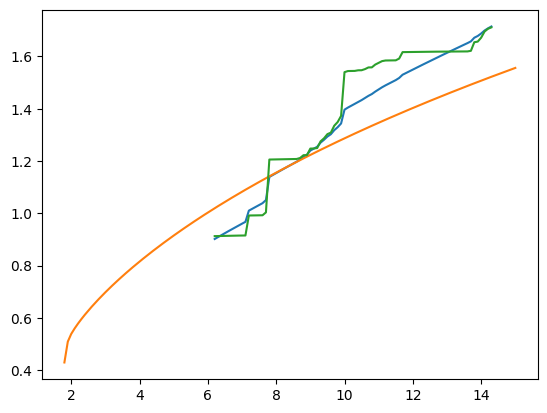

In [538]:
OPM0 = OSP2.get_OPM(F0_RMu(Ks),Ks,m)
OPM_ = OSP2.get_OPM(F_RMu(K_match),Ks,m)

plt.plot(Ks,OPM_)
plt.plot(Ks,OPM0)
plt.plot(Ks,OPM)
plt.axhline(OPM[0])
plt.axhline(OPM[0])

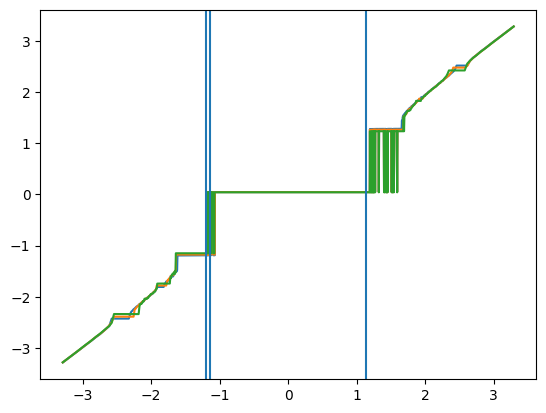

In [539]:
plt.plot(omega,TLO_info['avg_dtheta'].iloc[K_idx])
plt.plot(omega,TLO_info['avg_dtheta'].iloc[K_idx+5])
plt.plot(omega,TLO_info['avg_dtheta'].iloc[K_idx+9])
# plt.axvline(OPM[0])
plt.axvline(OPMs[K_idx])
plt.axvline(-OPMs[K_idx])
plt.axvline(-OPM[K_idx])
# plt.axvline(OPM_[0])
# plt.axvline(-OPM_[0])
# plt.axvline(-OPM[0])

In [338]:
TLO_info['cluster_info']['min_O0']-TLO_info['cluster_info']['mean_O0']

5.7     -0.98995
5.8     -0.98995
5.9     -0.98995
6.0     -0.98995
6.1     -0.98995
          ...   
14.6   -1.936161
14.7   -1.959151
14.8   -1.960178
14.9   -1.968805
15.0   -1.977581
Length: 94, dtype: object

In [331]:
abs(TLO_info['cluster_info']['max_O0']-TLO_info['cluster_info']['mean_O0'])

5.7     0.985301
5.8     0.985301
5.9     0.985301
6.0     0.985301
6.1     0.985301
          ...   
14.6    1.942324
14.7    1.961204
14.8    1.960178
14.9    1.968805
15.0    1.977581
Length: 94, dtype: object

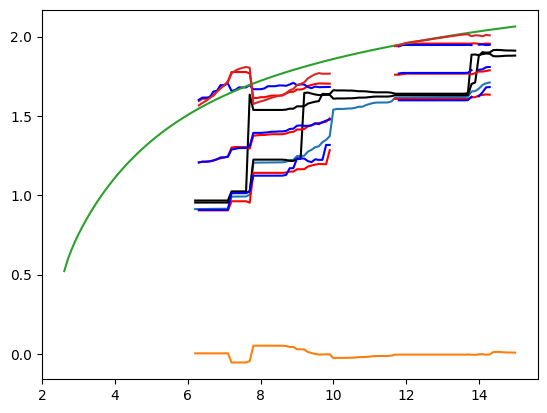

In [545]:
plt.plot(Ks,OPM)

plt.plot(TLO_info['cluster_info']['mean_O0'])
plt.plot(abs(TLO_info['cluster_info']['max_O0']-TLO_info['cluster_info']['mean_O0']),color='black')
plt.plot(abs(TLO_info['cluster_info']['min_O0']-TLO_info['cluster_info']['mean_O0']),color='black')


plt.plot(TLO_info['cluster_info']['mean_O+']-TLO_info['cluster_info']['mean_O0'],color='red')
plt.plot(TLO_info['cluster_info']['max_O+']-TLO_info['cluster_info']['mean_O0'],color='red')
plt.plot(TLO_info['cluster_info']['min_O+']-TLO_info['cluster_info']['mean_O0'],color='red')
plt.plot(-TLO_info['cluster_info']['mean_O-']+TLO_info['cluster_info']['mean_O0'],color='blue')
plt.plot(-TLO_info['cluster_info']['max_O-']+TLO_info['cluster_info']['mean_O0'],color='blue')
plt.plot(-TLO_info['cluster_info']['min_O-']+TLO_info['cluster_info']['mean_O0'],color='blue')

plt.plot(Ks,OPA+OPSA+SA)
plt.plot(Ks,OPM+SS+OSP)

In [244]:
K_match

array([ 5.96882439,  5.97139937,  5.97493678,  5.97762332,  5.98068728,
        5.98326138,  5.98583643,  5.98777848,  5.98955348,  6.03807897,
        6.15414627,  6.32046665,  6.48145246,  6.49878681,  6.66017285,
        6.9758612 ,  7.07880536,  7.43629964,  7.4372685 ,  8.62253535,
        8.62596973,  8.62854991,  8.68379606,  8.80628426,  9.04542262,
        9.10609324,  9.18213558,  9.39673344,  9.40015   ,  9.40318538,
        9.40643109,  9.40965703,  9.4117647 ,  9.41509816,  9.41664809,
        9.4193441 ,  9.42334622,  9.42325858,  9.42521475,  9.43000291,
        9.43048791,  9.43151873,  9.43284882,  9.51184233, 10.01468372,
       10.91850157, 10.92250817, 10.92361422, 10.92660327, 10.97809823,
       11.3504567 , 11.50100546, 11.76171405, 11.84507706, 11.90250916,
       11.98837431, 12.0190456 , 12.10678485, 12.19662758, 12.25820567,
       12.41158451, 12.41294524, 12.41709438, 12.41955617, 12.42203165,
       12.42198035, 12.4248419 , 12.42665509, 12.42804811, 12.43

## BACKWARD PROCESS

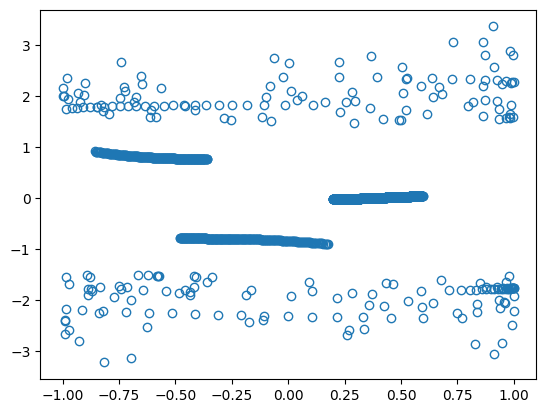

In [402]:
plt.plot(np.sin(Theta_last[:N]),Theta_last[N:],'o',fillstyle='none')

In [547]:
TLO_back_info = Qsimul.TLO_back(Theta_last,6.3)

In [548]:
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']
cluster_info_back = TLO_back_info['r_info']

In [549]:
K_idx = 0
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,OPM[K_idx])

ValueError: All-NaN slice encountered

In [ ]:
K_draw = np.arange(0,15+0.1/2,0.1)
_,_,rs0_d,rs0_u,_,_= OSP2.get_r_sec_np(K_draw,m,F0_R0u,F0_RMu,OPM[K_idx],samples=30)

In [ ]:
_,_,rs0_d,rs0_u,_,_= OSP2.get_r_sec0_np(K_draw,m,F0_R0u,F0_RMu,OPM[K_idx],samples=30)

In [423]:
RM = r_info['r_mean'].to_numpy(float)
R0 = r_info['r0'].to_numpy(float)
RP = r_info['r+'].to_numpy(float)
OPN = TLO_info['cluster_info']['min_O+']-TLO_info['cluster_info']['mean_O0']

OP = 4/np.pi *np.sqrt(Ks*RM/m) - 0.3056/np.sqrt(Ks*RM*m**3)
OSP = 4/np.pi *np.sqrt(Ks*RP/m) - 0.3056/np.sqrt(Ks*RP*m**3)
SS = (Ks**2*RP*R0)/(2*m*(1/m**2+(OPM)**2)) - (Ks**2*RP*RP)/(2*m**2*OPM*(1/m**2+(2*OPM)**2))


# OPA = 4/np.pi *np.sqrt(Ks*F_RMu(Ks)/m) - 0.3056/np.sqrt(Ks*F_RMu(Ks)*m**3)
# SA = (Ks**2*F_SRU(Ks)*F_R0u(Ks))/(2*m*(1/m**2+(OPA)**2)) - (Ks**2*F_SRU(Ks)*F_SRU(Ks))/(2*m**2*OPA*(1/m**2+(2*OPA)**2))
# OPSA = 4/np.pi *np.sqrt(Ks*F_SRU(Ks)/m) - 0.3056/np.sqrt(Ks*F_SRU(Ks)*m**3)

OPA = 4/np.pi *np.sqrt(Ks*F_RMu(Ks)/m) - 0.3056/np.sqrt(Ks*F_RMu(Ks)*m**3)
SA = (Ks**2*F_SRU(Ks)*F_R0u(Ks))/(2*m*(1/m**2+(OPA)**2)) - (Ks**2*F_SRU(Ks)*F_SRU(Ks))/(2*m**2*OPA*(1/m**2+(2*OPA)**2))
OPSA = 4/np.pi *np.sqrt(Ks*F_SRU(Ks)/m) - 0.3056/np.sqrt(Ks*F_SRU(Ks)*m**3)


O20 = OP+OSP+SS

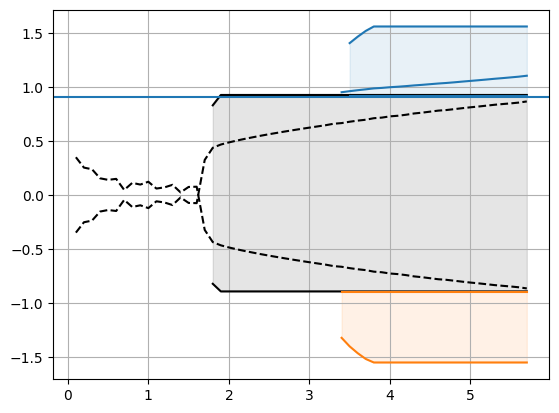

In [427]:
MAX_O0 = TLO_back_info['cluster_info']['max_O0'].to_numpy(float)
MIN_O0 = TLO_back_info['cluster_info']['min_O0'].to_numpy(float)

MAX_OP = TLO_back_info['cluster_info']['max_O+'].to_numpy(float)
MIN_OP = TLO_back_info['cluster_info']['min_O+'].to_numpy(float)

MAX_OM = TLO_back_info['cluster_info']['max_O-'].to_numpy(float)
MIN_OM = TLO_back_info['cluster_info']['min_O-'].to_numpy(float)

r0 = TLO_back_info['r_info']['r_mean'].to_numpy(float)
OP0 = 4/np.pi * np.sqrt(r0*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*r0*m**3)
rmA = F_RMu(Ks_back)
OP0A = 4/np.pi * np.sqrt(rmA*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*rmA*m**3)


rp = TLO_back_info['r_info']['r+'].to_numpy(float)
OPP = 4/np.pi * np.sqrt(rp*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*rp*m**3)

rm = TLO_back_info['r_info']['r-'].to_numpy(float)
# OPM = 4/np.pi * np.sqrt(rm*Ks_back/m) - 0.3056*1/np.sqrt(Ks_back*rm*m**3)

shift_P = Ks_back**2 * r0 * rp/(2*m*(1/m**2+(MAX_O0)**2)) - Ks_back**2 * rp * rp/(4*m*(1/m+(2*m*MAX_O0)**2)) 
shift_M = Ks_back**2 * r0 * rm/(2*m*(1/m**2+(MIN_O0)**2)) - Ks_back**2 * rm * rm/(4*m*(1/m+(2*m*MIN_O0)**2)) 
DR = Ks_back*rp
F_S,F_OR = OSP2.get_shift(abs(MAX_O0[~np.isnan(MAX_O0)][0]))

A = F_OR(OPM[0]+shift_P[0]+OPP[-1])
F_S,F_OR = OSP2.get_shift(abs(MAX_O0[~np.isnan(MAX_O0)][0]))
ORS = F_OR(MAX_OP[~np.isnan(MAX_OP)])


plt.plot(Ks_back, MAX_O0,color='black')
plt.plot(Ks_back, MIN_O0,color='black')
plt.fill_between(Ks_back,MIN_O0,MAX_O0,color='black' ,alpha=0.1,label='Main cluster')
plt.plot(Ks_back,OP0,color='black',linestyle='--')
plt.plot(Ks_back,-OP0,color='black',linestyle='--')


plt.plot(Ks_back, MAX_OP,color='tab:blue')
plt.plot(Ks_back, MIN_OP,color='tab:blue')
plt.fill_between(Ks_back,MIN_OP,MAX_OP,color='tab:blue' ,alpha=0.1)
plt.axhline(OPM[0])
plt.plot(Ks_back,OPM[0]+shift_M)
# plt.plot(Ks_back,A+DR)
# plt.axhline(-1.1659297694635238,color='tab:orange')

plt.plot(Ks_back, MAX_OM,color='tab:orange')
plt.plot(Ks_back, MIN_OM,color='tab:orange')
plt.fill_between(Ks_back,MIN_OM,MAX_OM,color='tab:orange' ,alpha=0.1)

plt.grid()
# plt.xlim(0,15)

In [435]:
F_S,F_OR = OSP2.get_shift(MAX_O0[-1])
F_S2,F_OR2 = OSP2.get_shift(abs(MIN_O0[-1]))
dK = 0.05
KB_draw = np.arange(0,K+dK/2,dK)
d,u,rs_db0,rs_ub0= OSP2.get_r_sec0_np(Ks_back,m,MAX_O0[-1],MAX_OP[-1],F_R0u,F_S,F_OR,samples=40)
d,u,rs_db1,rs_ub1= OSP2.get_r_sec0_np(Ks_back,m,abs(MIN_O0[-1]),abs(MIN_OM[-1]),F_R0u,F_S2,F_OR2,samples=40)


ValueError: x and y must have same first dimension, but have shapes (115,) and (58,)

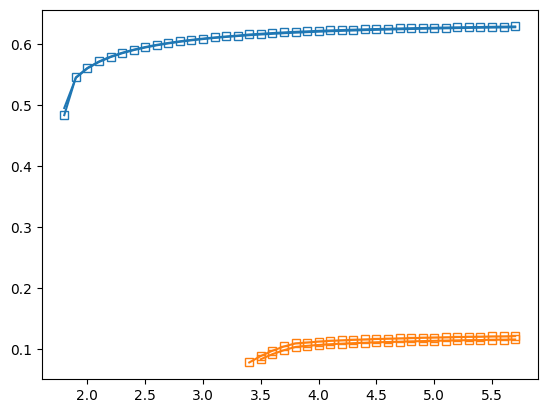

In [436]:
rp = r_info_back['r+']
rm = r_info_back['r-']
r0 = r_info_back['r0']
plt.plot(Ks_back,r0,'s-',color='tab:blue',fillstyle='none')
plt.plot(Ks_back,rm,'s-',color='tab:orange',fillstyle='none')
plt.plot(Ks_back,rp,'s-',color='tab:orange',fillstyle='none')
plt.plot(Ks_back,F0_R0u(Ks_back))
plt.plot(KB_draw,rs_ub0)
plt.plot(KB_draw,rs_ub1)

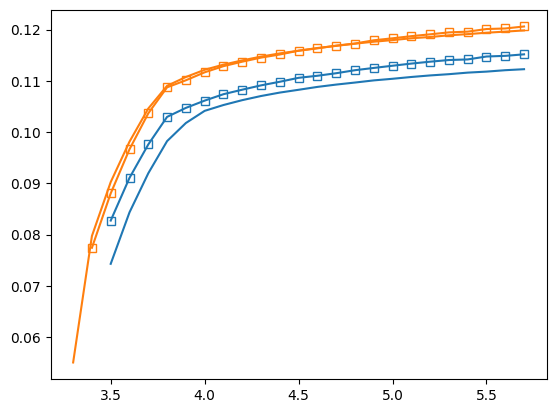

In [437]:
rp = r_info_back['r+']
rm = r_info_back['r-']
r0 = r_info_back['r0']
plt.plot(Ks_back,rp,'s-',color='tab:blue',fillstyle='none')
plt.plot(Ks_back,rm,'s-',color='tab:orange',fillstyle='none')
plt.plot(Ks_back,rs_ub0)
plt.plot(Ks_back,rs_ub1)
# plt.plot(K_draw,rs0_u)

## ***MANY m backward***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_set
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
from TO_sim.get_cluster import cluster_os_new2


from TO_sim.get_cluster import C_rsmso,cluster_os,C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
import parmap
from scipy.signal import find_peaks
from TO_sim.To_Draw import Draw_avg_vel_r
from tqdm.notebook import tqdm


In [661]:
import TO_sim.Integrator_jit as IJ

RK4_jit = IJ.RK4
RK4_jit_set = IJ.RK4_sets

RK4_jit_short = IJ.RK4_short

In [552]:
m_set = np.arange(0.1,10+0.5/2,0.5).reshape(-1,1)
K = 5
seed = 11
N = 1000
theta_init,omega,Kc = Q_Normal(N,0,1,seed=seed)
N_set = len(m_set)
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set,1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets = (np.ones((N_set,1))*omega)


# m = 10
t_end = 1000
dt =0.1
t = np.arange(0,t_end,dt)

theta_set, dtheta_set,rs = mf2_sets_TLO(m_set = m_set,N=N,K=K,t_array=t,p_theta=theta_sets,p_dtheta= 0*omega_sets,p_omega=omega_sets,result_time=int((t_end-350)*(1/dt)))

In [ ]:
THETA = RK4_jit_set(mf2_sets,m_set = m_set,y0 = theta_set,args=(N,K,t_array=t,p_theta=theta_sets,p_dtheta= 0*omega_sets,p_omega=omega_sets))

In [35]:
%whos mf2_sets

No variables match your requested type.


In [ ]:
plt.plot(t,rs.T[0].T)

In [13]:
import numba
from numba.typed import Dict

In [26]:
@numba.jitclass
def get_SOLS(m_set,QSIMS):
    sols = {}
    for m in m_set:
        sols[m] = QSIMS[m].solve()
    return sols

AttributeError: module 'numba' has no attribute 'jitclass'

In [32]:
N = 1000
K = 6
m_set = np.arange(1,10,0.5)
QSIMS = {}
for m in m_set:
    QSIMS[m] = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=8000,start_p=False,seed=6)

In [ ]:

# @numba.jit(nopython=True)
def get_SOLS(m_set,QSIMS):
    sols = {}
    for m in m_set:
        sols[m] = QSIMS[m].solve()
    return sols

In [8]:
import parmap
from functools import partial
from tqdm_loggable.auto import tqdm
parmap.map(print, range(10), pm_pbar = partial(tqdm, desc = "example"))

  0%|          | 0/10 [00:00<?, ?it/s]

0
6
7
8
9
1
4
2
3
5


[None, None, None, None, None, None, None, None, None, None]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import TO_sim.Integrator_jit as IJ
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
import TO_sim.Kuramoto_model as KM

RK4_jit = IJ.RK4
RK4_jit_set = IJ.RK4_sets
RK4_jit_short = IJ.RK4_short

In [3]:
KSM = KM.Kuramoto_2nd_mf_sets

In [96]:
dm = 0.5
m_set = np.arange(0.,10+dm/2,dm)[1:].reshape(-1,1)
K = 5
seed = 11
N = 1000
theta_init,omega,Kc = Q_Normal(N,0,1,seed=seed)
N_set = len(m_set)
omega = np.sort(omega) - np.mean(omega)
THETA = np.zeros(2*N)
THETA[:N] = theta_init
THETA[N:2*N] = omega

theta_sets = (np.ones((N_set,1))*THETA)
omega_sets = (np.ones((N_set,1))*omega)

t_end = 8000
dt =0.1
t = np.arange(0,t_end+dt/2,dt)

In [97]:
SOL = RK4_jit_set(KSM,theta_sets,t,args=(omega_sets,N,m_set,K))

걸린시간 100.91s

In [98]:
theta_set = SOL[:,:,:N]
dtheta_set = SOL[:,:,N:]
Theta_last = SOL[-1,:]


In [99]:
Theta_last.shape

(20, 2000)

In [1]:
theta_set.shape

NameError: name 'theta_set' is not defined

In [101]:
rset = abs(1/N*np.sum(np.exp(1j*theta_set[-5000:]),axis=2))
ms = m_set.flatten()

: 

In [ ]:
df_NEW = pd.read_excel('NEW Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])

In [ ]:
RM = df_NEW.query('K==5').query(f'(m %1 ==0)&m!=0')['rM_u'].to_numpy(float)

In [ ]:
rset.shape

(5000, 10)

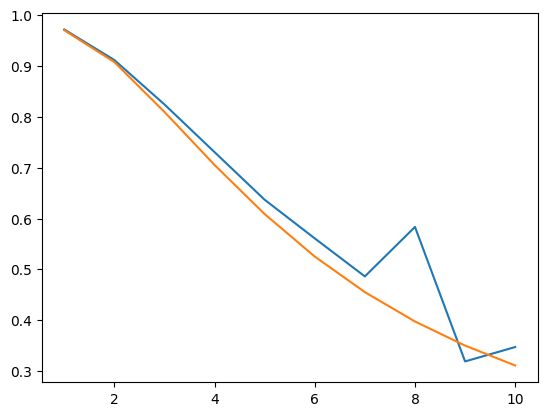

In [ ]:
plt.plot(m_set.flatten(),np.mean(rset,axis=0))
plt.plot(ms,RM)

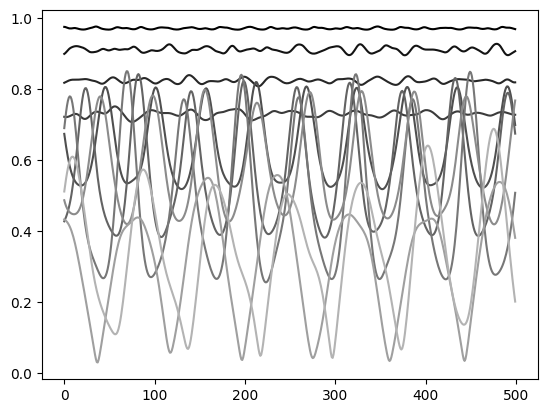

In [22]:
lns = plt.plot(rset[-500:])
color = plt.cm.gray(np.linspace(0.0,0.7,len(lns)))
for i,l in enumerate(lns):
    l.set_color(color[i])

## QSIM 사용

1. theta_last를 m_set에 따라서 Qsim class에 다 할당
2. TLO_back info를 모든 m에 대해서 할당
3. backward 과정이 어디까지 가는지 확인

In [43]:
r_mean = np.mean(rset,axis=0)

In [48]:
rset.shape

(5000, 10)

In [82]:
N = 1000
K = 6
# m_set = np.arange(1,10.5,1)

QSIMS = {}
R_CLU_LAST = {}
for i,m in enumerate(ms):
    QSIMS[m] = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=1500,start_p=False,seed=6)
    QSIMS[m].theta = theta_set[:,i]
    QSIMS[m].dtheta = dtheta_set[:,i]
    QSIMS[m].r_mean = r_mean[i]
    QSIMS[m].rs = rset[:,i]
    QSIMS[m].Theta_last = Theta_last[i]
    CLU = QSIMS[m].get_cluster(sum_time = 800)
    QSIMS[m].avg_dtheta_last = CLU['avg_dtheta_last']
    R_CLU_LAST[m] = QSIMS[m].get_r_clu_last(sum_time = 800)

(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)


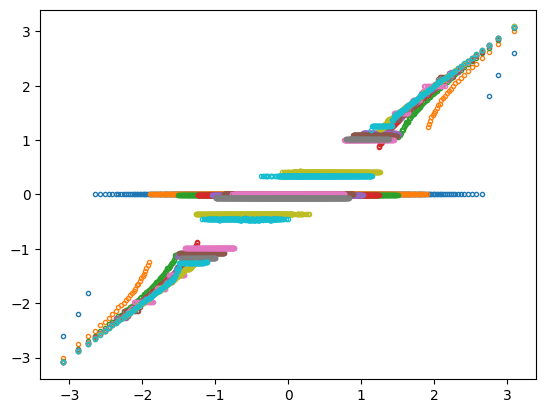

In [78]:
for m in ms:
    ADL  = QSIMS[m].avg_dtheta_last
    print(ADL.shape)
    plt.plot(QSIMS[m].omega,ADL,'.',markerfacecolor='none')

In [86]:
Theta_last

array([[-2.08915399e+04, -1.76163541e+04, -1.45497017e+04, ...,
         1.07699567e+00,  8.12005820e-01,  3.16832999e+00],
       [-2.40073862e+04, -2.21209197e+04, -2.09199332e+04, ...,
         1.90069307e+00,  2.24091525e+00,  3.48095089e+00],
       [-2.44693726e+04, -2.27077262e+04, -2.16138015e+04, ...,
         3.21698229e+00,  3.25136794e+00,  2.71362327e+00],
       ...,
       [-2.47095597e+04, -2.30087014e+04, -2.19548841e+04, ...,
         2.73952136e+00,  2.93775320e+00,  3.13756987e+00],
       [-2.47190174e+04, -2.30215856e+04, -2.19746688e+04, ...,
         2.70030172e+00,  2.89277481e+00,  3.10158544e+00],
       [-2.47197632e+04, -2.30264166e+04, -2.19767176e+04, ...,
         2.68781114e+00,  2.90101002e+00,  3.08547262e+00]])

In [89]:
TLO_back_infos = {}

for m in tqdm(ms):
    TL = QSIMS[m].Theta_last
    TLO_back_infos[m]  = QSIMS[m].TLO_back(TL,K_back=K)

  0%|          | 0/10 [00:00<?, ?it/s]

In [75]:
sol = QSIMS[1].solve()

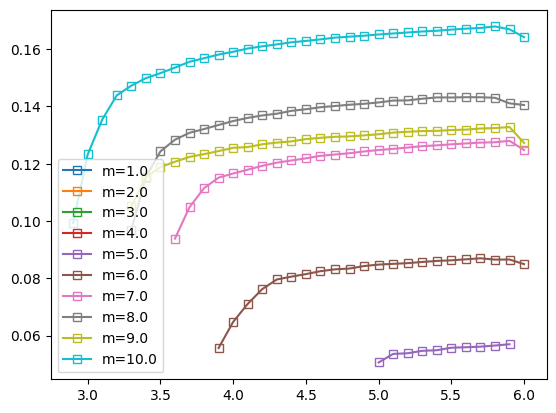

In [95]:
for m in ms:
    r_info_back =  TLO_back_infos[m]['r_info']
    rp = r_info_back['r+']
    Ks_back = r_info_back['r+'].index
    rm = r_info_back['r-']
    r0 = r_info_back['r0']
    plt.plot(Ks_back,rp,'s-',fillstyle='none',label=f'm={m}')

plt.legend()
    # plt.plot(Ks_back,rm,'s-',color='tab:orange',fillstyle='none')

In [83]:
r_0s = [] 
r_Ms = [] 
r_SPs = [] 
r_SMs = [] 
r_SMTs = [] 
r_SPTs = [] 


for m in ms:
    R = R_CLU_LAST[m]['r_clu_mean_last']
    RM = R_CLU_LAST[m]['r_total_mean']
    r_Ms.append(float(RM))
    for name in ['0','+','-','+_total','-_total']:
        try:
            match name:
                case '0':Radd = r_0s;Radd.append(float(R[name]))
                case '+':Radd = r_SPs;Radd.append(float(R[name]))
                case '-':Radd = r_SMs;Radd.append(float(R[name]))
                case '+_total':Radd = r_SPTs;Radd.append(float(R[name]))
                case '-_total':Radd = r_SMTs;Radd.append(float(R[name]))
        except KeyError:
            Radd.append(np.nan)


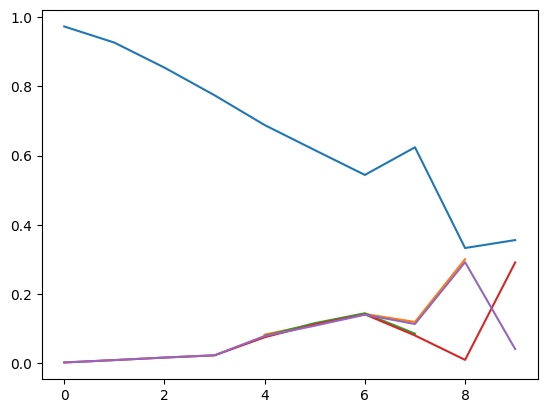

In [65]:
plt.plot(r_0s)
plt.plot(r_SPs)
plt.plot(r_SMs)
plt.plot(r_SMTs)
plt.plot(r_SPTs)

In [105]:
Qsim = QSIMS[1]
_ = Qsim.solve()

In [107]:
cluster_info = Qsim.get_cluster(sum_time=500)
r_clu_info = Qsim.get_r_clu(sum_time=500)

In [110]:
import TO_sim.parmap_use as PU
import parmap
imp.reload(PU)

<module 'TO_sim.parmap_use' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/parmap_use.py'>

In [114]:
THETA_LASTS = {}
for m,theta_last in parmap.map(PU.QSIM_get_theta_last,m_set,QSIMS = QSIMS,pm_pbar=True, pm_processes=10):
    THETA_LASTS[m] = theta_last

  0%|          | 0/10 [00:00<?, ?it/s]

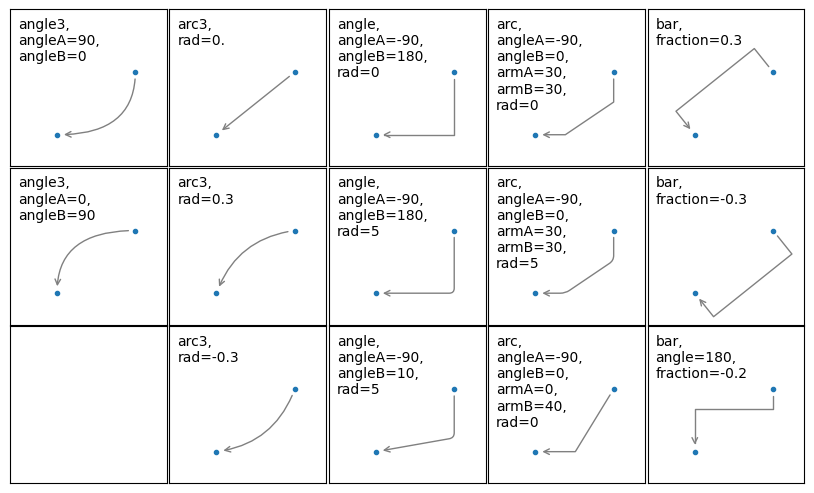

In [44]:
import matplotlib.pyplot as plt


def demo_con_style(ax, connectionstyle):
    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
            transform=ax.transAxes, ha="left", va="top")


fig, axs = plt.subplots(3, 5, figsize=(8, 4.8))
demo_con_style(axs[0, 0], "angle3,angleA=90,angleB=0")
demo_con_style(axs[1, 0], "angle3,angleA=0,angleB=90")
demo_con_style(axs[0, 1], "arc3,rad=0.")
demo_con_style(axs[1, 1], "arc3,rad=0.3")
demo_con_style(axs[2, 1], "arc3,rad=-0.3")
demo_con_style(axs[0, 2], "angle,angleA=-90,angleB=180,rad=0")
demo_con_style(axs[1, 2], "angle,angleA=-90,angleB=180,rad=5")
demo_con_style(axs[2, 2], "angle,angleA=-90,angleB=10,rad=5")
demo_con_style(axs[0, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0")
demo_con_style(axs[1, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5")
demo_con_style(axs[2, 3], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0")
demo_con_style(axs[0, 4], "bar,fraction=0.3")
demo_con_style(axs[1, 4], "bar,fraction=-0.3")
demo_con_style(axs[2, 4], "bar,angle=180,fraction=-0.2")

for ax in axs.flat:
    ax.set(xlim=(0, 1), ylim=(0, 1), xticks=[], yticks=[], aspect=1)
fig.tight_layout(pad=0.2)

plt.show()
